# Exercises "Lecture 8: Exploratory Data Analysis and Visualisation"

In this session, we will compute statistics and visualizations on Wikipedia articles from 16 categories: 

Airports, Artists, Astronauts, Astronomical_objects, Building,City,Comics_characters, Companies,Foods, Monuments_and_memorials,Politicians,Sports_teams,Sportspeople, Transport, 
Universities_and_colleges, Written_communication.

Data: wkp directory         
Python libraries
- os, to list files in a directory
- re, regexp library
- pandas
- spacy (or Stanza)

## Loading text files into a Pandas dataframe

**Exercise 1** 

* Use a regexp and the list of categories (given above and pasted below) to split each file name in the wkp/ directory into id and category as illustrated below (cf. regexp CS)

```
File Name: Monteverde_Angel_Monuments_and_memorials
id: Monteverde_Angel
category: Monuments_and_memorials
```

* Extract the content of the file (use read(), cf. python_basics CS))

* Create a list of lists of the form (id, category, file_content) e.g., 

```
[['Monteverde_Angel', 'Monuments_and_memorials', 'The Monteverde Angel or Angel of the Resurrect ....], ...]
```

* Create a dataframe from this list of lists with headers 'Id', 'Category' and'Text' (cf. pandas CS)

In [12]:
Categories = ['Airports', 'Artists', 'Astronauts', 'Astronomical_objects', 'Building','City','Comics_characters', 'Companies',\
              'Foods', 'Monuments_and_memorials','Politicians','Sports_teams','Sportspeople', 'Transport', \
              'Universities_and_colleges', 'Written_communication'] 
        

In [13]:
import re
import os
import pandas as pd
import spacy

In [82]:
wiki_list = []
#os.chdir('wkp')
print(os.getcwd())
for file in os.listdir(os.getcwd()):
    #print(file)
    with open(file, 'r') as f:
        content = f.readlines()
        #print(len(content))
        name = re.sub(r'\.txt','', file)
        #print(name) 
        category = re.search(r'_[A-Z][a-z_]+$', name).group()[1:]
        _id = re.sub(r'_{}$'.format(category),'',name)
        wiki_list.append([_id, category,re.sub(r'[\[\]]', '', str(content))])
        
        


print(len(wiki_list))
#for element in wiki_list:
    #print(element)
        

df = pd.DataFrame(wiki_list, columns = ['id', 'category', 'content'])
df

/home/chankevin/Documents/M1S2/data science/wkp
160


,id,category,content
0,St._Catherine_University,Universities_and_colleges,"""St. Catherine University (St. Kate's) is a pr..."
1,Downwash,Building,"""In aeronautics, downwash is the change in dir..."
2,Ulrich_Walter,Astronauts,"'Ulrich Hans Walter (born February 9, 1954) is..."
3,Wolfgang_Nordwig,Sportspeople,'Wolfgang Nordwig (born 27 August 1943) is a f...
4,Smiřice,City,'Smiřice (Czech pronunciation: ˈsmɪr̝ɪtsɛ; Ger...
...,...,...,...
155,Natural_burial,Monuments_and_memorials,'Natural burial is the interment of the body o...
156,Hnúšťa,City,'Hnúšťa (Hungarian: Nyustya) is a town and mun...
157,Al_Jazeera_effect,Companies,"""The Al Jazeera effect is a term used in polit..."
158,Al-Haj_Suliman_Yari,Politicians,'Al-Haj Suliman Yari (19 August 1936 – 10 May ...


## Extract the list of categories

**Exercise 2** 
    
- store the content of the Category column into a string (cf. Pandas CS)
- extract the uniq tokens from that string (cf. python basic CS)   
You should find the following 16 categories

```
['Comics_characters', 'Astronauts', 'Transport', 'Artists', 'Written_communication', 'Sports_teams', 'Foods', 'Airports', 'Monuments_and_memorials', 'Politicians', 'Sportspeople', 'Building', 'Universities_and_colleges', 'Astronomical_objects', 'Companies', 'City']
```

In [71]:
content = df['category'].str.cat(sep="\t")
tokens = content.split('\t')
uniq_tokens = list(set(tokens))
uniq_tokens

['Sports_teams',
 'Astronauts',
 'Written_communication',
 'Sportspeople',
 'Foods',
 'Artists',
 'Companies',
 'Universities_and_colleges',
 'Transport',
 'Astronomical_objects',
 'Monuments_and_memorials',
 'City',
 'Airports',
 'Politicians',
 'Comics_characters',
 'Building']

## Extract the list of headers from the 'Text' column

**Exercise 3** 

In the Wikipedia articles, headers are surrounded by "==" 

_*E.g., ==  Background == *_

- Define a function which extracts headers from a text (Use a regular expression)
- Apply this function to the Text column in your panda frame (use pandas 'apply' method)
- Store the result (the list of headers associated with each text in the frame) into a new pandas serie called 'Headers'
- Concatenate this serie to your pandas dataframe

In [72]:
def header_extraction(string):
    results = str(re.findall(r'== \w+ ==',string))
    results = re.sub(r'(== | ==)', '', results)
    return results

In [73]:
df['Headers'] = df['content'].apply(header_extraction)
df

,id,category,content,Headers
0,St._Catherine_University,Universities_and_colleges,"""St. Catherine University (St. Kate's) is a pr...","['History', 'Founders', 'Organization', 'Partn..."
1,Downwash,Building,"""In aeronautics, downwash is the change in dir...",['References']
2,Ulrich_Walter,Astronauts,"'Ulrich Hans Walter (born February 9, 1954) is...","['Education', 'Spaceflight', 'Career', 'Refere..."
3,Wolfgang_Nordwig,Sportspeople,'Wolfgang Nordwig (born 27 August 1943) is a f...,['References']
4,Smiřice,City,'Smiřice (Czech pronunciation: ˈsmɪr̝ɪtsɛ; Ger...,"['History', 'References']"
...,...,...,...,...
155,Natural_burial,Monuments_and_memorials,'Natural burial is the interment of the body o...,"['Memorialization', 'Hybrid', 'Locations', 'Ca..."
156,Hnúšťa,City,'Hnúšťa (Hungarian: Nyustya) is a town and mun...,"['History', 'Geography', 'Demographics', 'Econ..."
157,Al_Jazeera_effect,Companies,"""The Al Jazeera effect is a term used in polit...","['Impact', 'Subaltern', 'References']"
158,Al-Haj_Suliman_Yari,Politicians,'Al-Haj Suliman Yari (19 August 1936 – 10 May ...,['References']


## Extracting the Vocabulary of each Category

For each category, we extract the corresponding vocabulary i.e., the list of tokens occurring in the corresponding texts (removing the duplicates)


Optional: for each category
- extract the list of headers
- extract the noun and verbs 

**Exercise 4**

- Define a function 'get_tokens' which, given a category, return its vocabulary (the list of tokens occurring in the texts of that category and after removing the duplicates). One way to do this is to:
   - extract the category subframe i.e., all rows whose category column matches the input category
   - create a string out of the text column of that subframe (use str.cat(sep=" "), cf. Pandas CS)
   - run SpaCy or Stanza model on this string and extract the tokens from the resulting document (cf. pstanza or spacy CS)
   - use python set method to remove duplicate tokens
   - use python list method to convert the resulting set back into a list
- Create a new dataframe with headers 'CATEGORY' and 'VOCABULARY' in which you store for each category the corresponding vocabulary

In [74]:
def get_token(value,df):
    
    sub_df = df.loc[df['category']==value]
    vocabulary = list(set(re.findall(r'\w+', sub_df['content'].str.cat(sep=' '))))
    return vocabulary

voc_headers = get_token('Airports', df)
voc = []
for element in Categories:
    voc.append([element, sorted(get_token(element,df))])
    
df2 = pd.DataFrame(voc, columns=['category', 'vocabulary'])
df2



,category,vocabulary
0,Airports,"[0, 000, 05, 08, 09177, 1, 10, 100, 101, 103, ..."
1,Artists,"[0, 00, 000, 02026, 042, 05, 06, 0682, 0836981..."
2,Astronauts,"[0, 00, 000, 01, 02, 03, 0435, 0450, 0475, 048..."
3,Astronomical_objects,"[0, 00, 000, 0002109, 01, 02, 020, 034, 051, 1..."
4,Building,"[0, 04, 1, 10, 100, 1000, 100C, 101, 11, 1100,..."
5,City,"[0, 000, 025, 049, 06, 07, 08, 1, 10, 100, 104..."
6,Comics_characters,"[0, 000, 08, 09, 1, 11, 112, 1124, 117, 1193, ..."
7,Companies,"[0, 000, 1, 10, 100, 101, 11, 12, 120, 125, 13..."
8,Foods,"[000, 1, 10, 100, 1100th, 11th, 13, 14, 15, 15..."
9,Monuments_and_memorials,"[0, 000, 060, 0714527688, 1, 10, 100, 101, 102..."


## Visualising the differences in Vocabulary Size

**Exercise 5**

- Use pandas 'apply' method to compute for each vocabulary its size (the number of tokens)
- Add a 'VOCAB SIZE' column to your the dataframe created in the previous exercise in which you input the size of the vocabulary for each category

In [75]:
df2['vocab_size']=df2['vocabulary'].apply(lambda x:len(x))
df2

,category,vocabulary,vocab_size
0,Airports,"[0, 000, 05, 08, 09177, 1, 10, 100, 101, 103, ...",3588
1,Artists,"[0, 00, 000, 02026, 042, 05, 06, 0682, 0836981...",3483
2,Astronauts,"[0, 00, 000, 01, 02, 03, 0435, 0450, 0475, 048...",3829
3,Astronomical_objects,"[0, 00, 000, 0002109, 01, 02, 020, 034, 051, 1...",1780
4,Building,"[0, 04, 1, 10, 100, 1000, 100C, 101, 11, 1100,...",3017
5,City,"[0, 000, 025, 049, 06, 07, 08, 1, 10, 100, 104...",3388
6,Comics_characters,"[0, 000, 08, 09, 1, 11, 112, 1124, 117, 1193, ...",4264
7,Companies,"[0, 000, 1, 10, 100, 101, 11, 12, 120, 125, 13...",3172
8,Foods,"[000, 1, 10, 100, 1100th, 11th, 13, 14, 15, 15...",3560
9,Monuments_and_memorials,"[0, 000, 060, 0714527688, 1, 10, 100, 101, 102...",3638


**Exercise 6**

Create a Barplot showing the Vocabulary Size of each Category (use e.g., pandas barh)

- the y axis should show the categories
- the x axis should show the vocabulary size

<AxesSubplot:ylabel='category'>

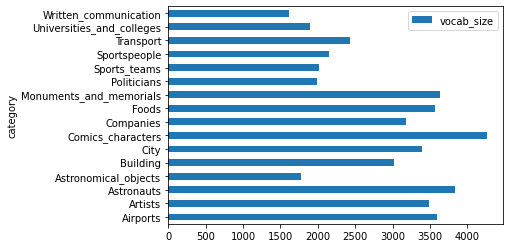

In [76]:
df2.plot.barh(x='category', y='vocab_size', )

In [77]:
def nb_words(pattern:str, string):
    motif = re.compile(r'{}'.format(pattern))
    nb = re.findall(motif,string)
    return len(nb)


In [69]:
pattern = 'do'

res = df['content'].apply(lambda x:(nb_words(pattern, x)))
res

0      15
1       3
2       4
3       4
4       1
       ..
155    22
156     2
157     5
158     0
159     2
Name: content, Length: 160, dtype: int64